# Pytorch and Tensorflow 102 Polynomial Regression

The polynomial regression is the next step, the main difference apart from linear regression is the number of weights.

First, let's consider customize ML without using pytorch or TensorFlow

# Customize Machine Learning

In [297]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'y = 1000 -2x - 4x^2')

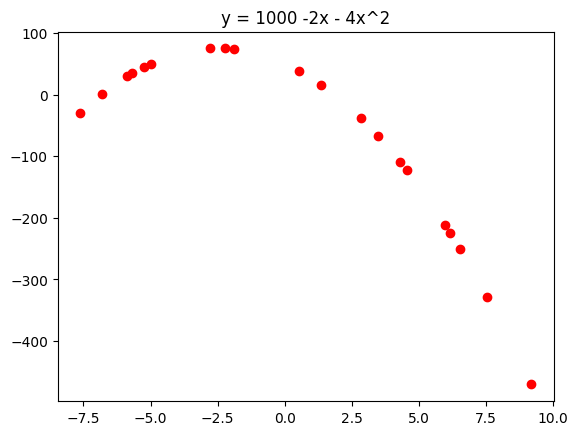

In [497]:
# we define 
X = np.random.uniform(low=-10, high=10, size=(20,)).astype(np.float32)
Y = 50-(20*X) - (4*(X**2))
X_test = np.random.uniform(low=-10, high=10, size=(20,)).astype(np.float32)
plt.plot(X,Y,'ro')
plt.title("y = 1000 -2x - 4x^2")

### We define loss function by predicted (forward)

In [483]:
def forward(x,w0,w1,w2): 
    return w0 + (w1*x) + (w2*(x)**2)
def loss(y,y_predicted):
    return np.mean((y_predicted-y)**2)
class gredient_loss():
    def __init__(self,x,y,y_predicted):
        self.x = x 
        self.y = y
        self.y_predicted = y_predicted

    def order0(self):
        return 2*np.mean((self.y_predicted-self.y))
                      
    def order1(self):
        return np.mean(2 * (self.y_predicted - self.y) * self.x)
    
    def order2(self):
        return np.mean(2 * (self.y_predicted - self.y) * (self.x**2))


In [494]:

epochs = 10000
initial_lr = 0.0001
w0,w1,w2 = np.random.rand(3)

loss_custom = []
w_custom = []
for epoch in range(epochs):
    learning_rate = initial_lr 
    y_predict = forward(X,w0,w1,w2)
    l         = loss(Y,y_predict)
    loss_custom.append(l)
    
    gredient  = gredient_loss(X,Y,y_predict)
    dw0,dw1,dw2  = gredient.order0(),gredient.order1(),gredient.order2()
    w0   -= learning_rate*dw0
    w1   -= learning_rate*dw1
    w2   -= learning_rate*dw2
    w_custom.append([w1,w2,w0])

    if epoch % 2 == 0:
        print(f'epoch:{epoch+1}: w0 = {w0:.3f},w1 = {w1:.3f},w2 = {w2:.3f}, loss = {l:.8f}')

epoch:1: w0 = 0.159,w1 = 0.171,w2 = -1.207, loss = 50355.38281250
epoch:3: w0 = 0.146,w1 = -0.125,w2 = -2.741, loss = 18715.66015625
epoch:5: w0 = 0.149,w1 = -0.404,w2 = -3.228, loss = 15163.04199219
epoch:7: w0 = 0.158,w1 = -0.675,w2 = -3.381, loss = 14473.36425781
epoch:9: w0 = 0.168,w1 = -0.941,w2 = -3.428, loss = 14083.39355469
epoch:11: w0 = 0.179,w1 = -1.203,w2 = -3.440, loss = 13732.45019531
epoch:13: w0 = 0.190,w1 = -1.462,w2 = -3.443, loss = 13393.81250000
epoch:15: w0 = 0.201,w1 = -1.717,w2 = -3.441, loss = 13064.54394531
epoch:17: w0 = 0.212,w1 = -1.969,w2 = -3.439, loss = 12744.12792969
epoch:19: w0 = 0.223,w1 = -2.217,w2 = -3.436, loss = 12432.29980469
epoch:21: w0 = 0.234,w1 = -2.462,w2 = -3.433, loss = 12128.82617188
epoch:23: w0 = 0.245,w1 = -2.703,w2 = -3.430, loss = 11833.48632812
epoch:25: w0 = 0.256,w1 = -2.941,w2 = -3.428, loss = 11546.05566406
epoch:27: w0 = 0.267,w1 = -3.177,w2 = -3.425, loss = 11266.32617188
epoch:29: w0 = 0.277,w1 = -3.408,w2 = -3.422, loss = 1

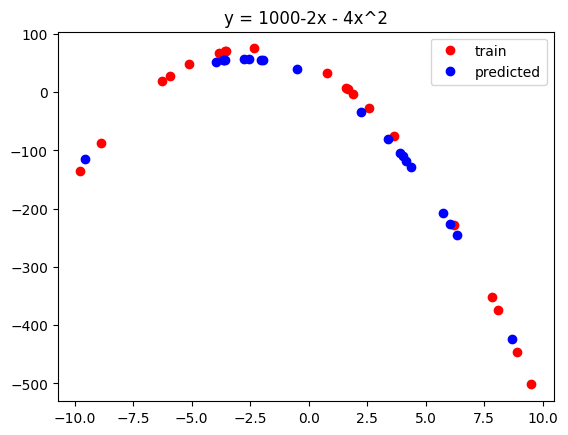

In [495]:
plt.plot(X,Y,'ro', label='train')
plt.plot(X_test,forward(X_test,w0,w1,w2),'bo', label='predicted')
plt.title("y = 1000-2x - 4x^2")
plt.legend()

In [439]:
# epochs = 10000
# initial_lr = 0.0001
# w0,w1,w2 = np.random.rand(3)
# batch_size = 4  # Mini-batch size

# for epoch in range(epochs):
#     for i in range(0, len(X), batch_size):
#         X_batch = X[i:i+batch_size]
#         Y_batch = Y[i:i+batch_size]

#         y_predict = forward(X_batch, w0, w1, w2)
#         l = loss(Y_batch, y_predict)
#         gredient = gredient_loss(X_batch, Y_batch, y_predict)
#         dw0, dw1, dw2 = gredient.order0(), gredient.order1(), gredient.order2()

#         w0 -= learning_rate * dw0
#         w1 -= learning_rate * dw1
#         w2 -= learning_rate * dw2

#     if epoch % 1000 == 0:
#         print(f'epoch:{epoch+1}: w0 = {w0:.3f},w1 = {w1:.3f},w2 = {w2:.3f}, loss = {l:.8f}')


# Polynomial Regression with Pytorch

Similar to Linear regression, we need a class of model: here we define x_poly as follows
and notice that the bias terms are automatically included in nn.Module.Linear model so that we need just [x, x**2]

In [499]:
import torch
import torch.nn as nn 

class Polynomial_Regression(nn.Module): 
    def __init__(self):
        super(Polynomial_Regression, self).__init__()  
        self.poly = nn.Linear(2, 1)  
    def forward(self, x):
        x_poly = torch.cat([x, x**2], 1)
        return self.poly(x_poly)

def pytorch_columnize(z):
    return torch.from_numpy(z.reshape(len(z),1))

In [498]:
X = pytorch_columnize(X)
Y = pytorch_columnize(Y)
X_test = pytorch_columnize(X_test)

In [500]:
model = Polynomial_Regression()
n_iters = 200
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

loss_pytorch = []
w_pytorch = []
for epoch in range(n_iters):
    learning_rate = 1 
    y_pred = model(X)
    l = loss(Y,y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_pytorch.append(l.detach().numpy())
    [w,b] = model.parameters()
    w_pytorch.append([w[0][0].item(),w[0][1].item(),b[0].item()])
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch:{epoch+1}: w1 = {w[0][0].item():.3f},w2 = {w[0][1].item():.3f},b = {b[0].item():.3f}, loss = {l:.8f}')
print(f'predict before training: f(5) = {model(X_test).detach()}')




epoch:1: w1 = -0.666,w2 = -0.894,b = -0.909, loss = 28700.04296875
epoch:11: w1 = -10.011,w2 = -4.191,b = -0.807, loss = 6873.45703125
epoch:21: w1 = -17.642,w2 = -2.338,b = 5.310, loss = 2060.93359375
epoch:31: w1 = -22.253,w2 = -3.486,b = 9.050, loss = 1054.72399902
epoch:41: w1 = -22.828,w2 = -2.816,b = 14.063, loss = 803.54650879
epoch:51: w1 = -21.561,w2 = -3.383,b = 17.868, loss = 484.93920898
epoch:61: w1 = -20.210,w2 = -3.301,b = 22.074, loss = 313.07244873
epoch:71: w1 = -19.830,w2 = -3.470,b = 25.935, loss = 230.51103210
epoch:81: w1 = -20.074,w2 = -3.561,b = 29.613, loss = 161.82093811
epoch:91: w1 = -20.313,w2 = -3.583,b = 32.997, loss = 113.12854004
epoch:101: w1 = -20.311,w2 = -3.686,b = 35.920, loss = 77.77879333
epoch:111: w1 = -20.178,w2 = -3.736,b = 38.498, loss = 51.59191895
epoch:121: w1 = -20.094,w2 = -3.783,b = 40.721, loss = 33.67510986
epoch:131: w1 = -20.086,w2 = -3.833,b = 42.606, loss = 21.41048813
epoch:141: w1 = -20.088,w2 = -3.867,b = 44.189, loss = 13.258

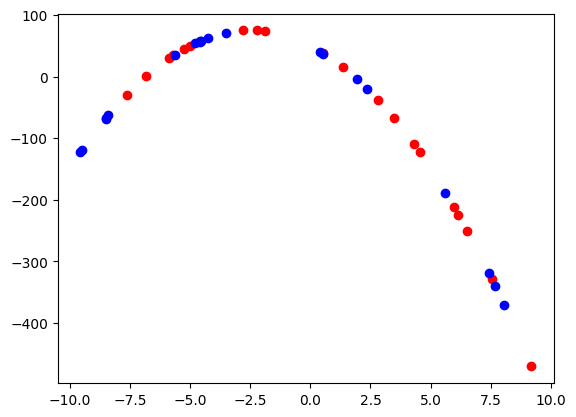

In [501]:
plt.plot(X,Y,'ro')
plt.plot(X_test,model(X_test).detach(),'bo')

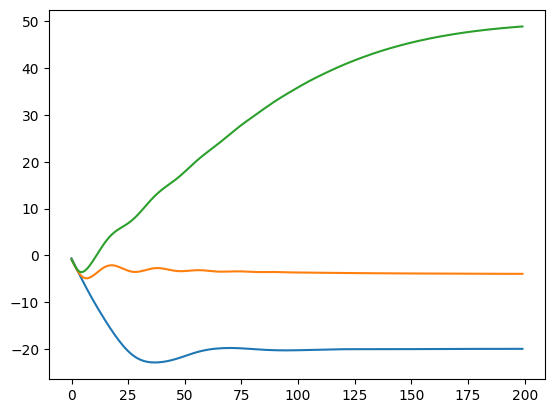

In [502]:
plt.plot(np.array(w_pytorch)[:,0])
plt.plot(np.array(w_pytorch)[:,1])
plt.plot(np.array(w_pytorch)[:,2])

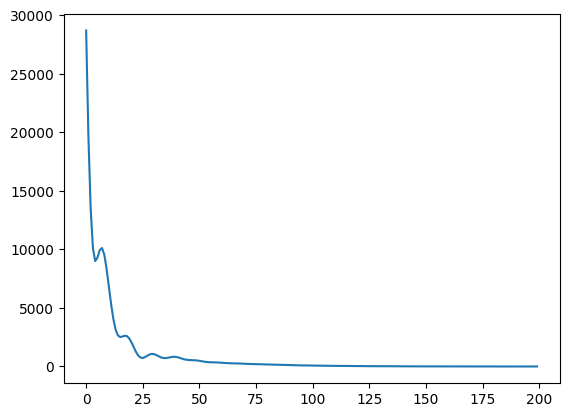

In [503]:
plt.plot(loss_pytorch)

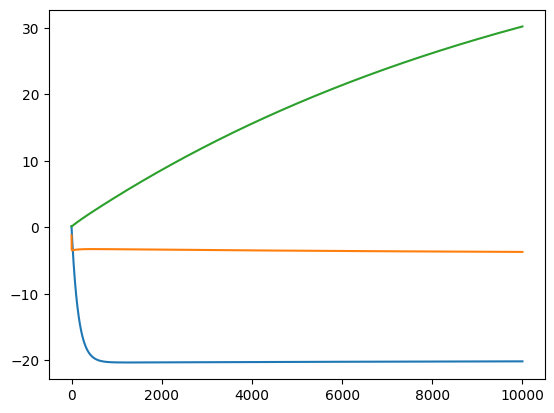

In [504]:
plt.plot(np.array(w_custom)[:,0])
plt.plot(np.array(w_custom)[:,1])
plt.plot(np.array(w_custom)[:,2])